In [1]:
# Import necessary libraries
import os
from IPython.display import display, Image
from concept_discovery.pipelines import run_training_pipeline, run_inference_pipeline

## Overview

This demo utilizes a custom Deep Feature Factorization (DFF) pipeline developed to extend the ideas presented in the paper ["Deep Feature Factorization for Concept Discovery" by Edo Collins et al., ECCV 2018](https://ivrlwww.epfl.ch/ecollins/deep_feature_factorization/).

The primary goals here are to demonstrate:
- How to train the pipeline to identify distinct visual concepts from a set of feature vectors that a Convolutional Neural Network (CNN) outputs when classifying 'flamingo' images.
- How to apply the learned concepts to feature vectors generated by new predictions of the CNN.

## Step 1: Training the Model

We start by training our DFF pipeline on features extracted by the pretrained CNN when predicting on images of flamingos.

In [2]:
# Execute the training pipeline for the 'flamingo' class
run_training_pipeline(
    class_names=['flamingo'],
    prediction_filter=True,
    certainty_filter=True,
    num_concepts=4,
)

## Step 2: Displaying Training Results

After training, the DFF pipeline generates visualizations representing the concepts it has discovered. These images highlight different aspects the CNN model focuses on when analyzing flamingos.

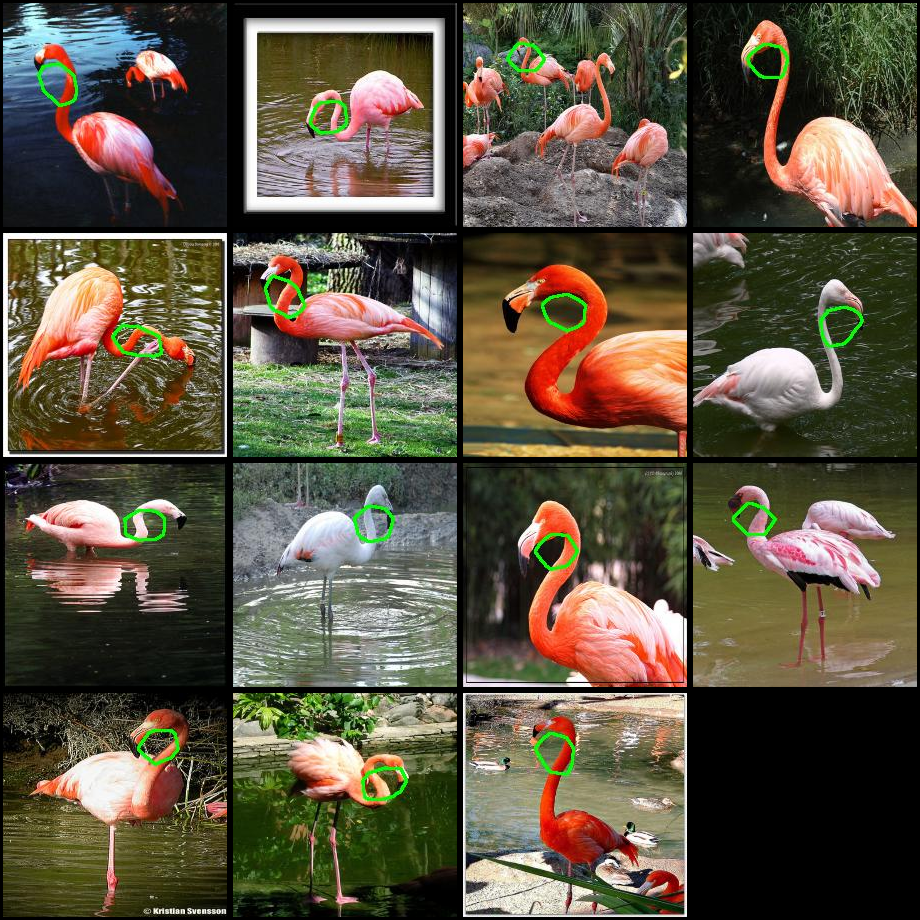

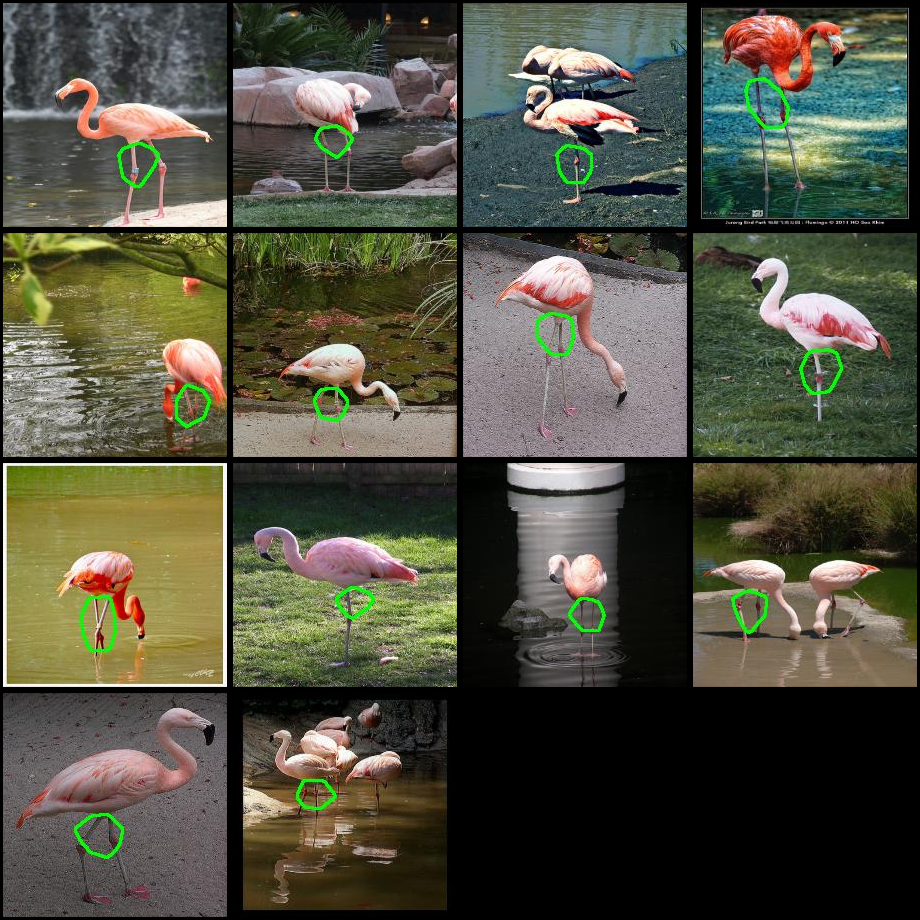

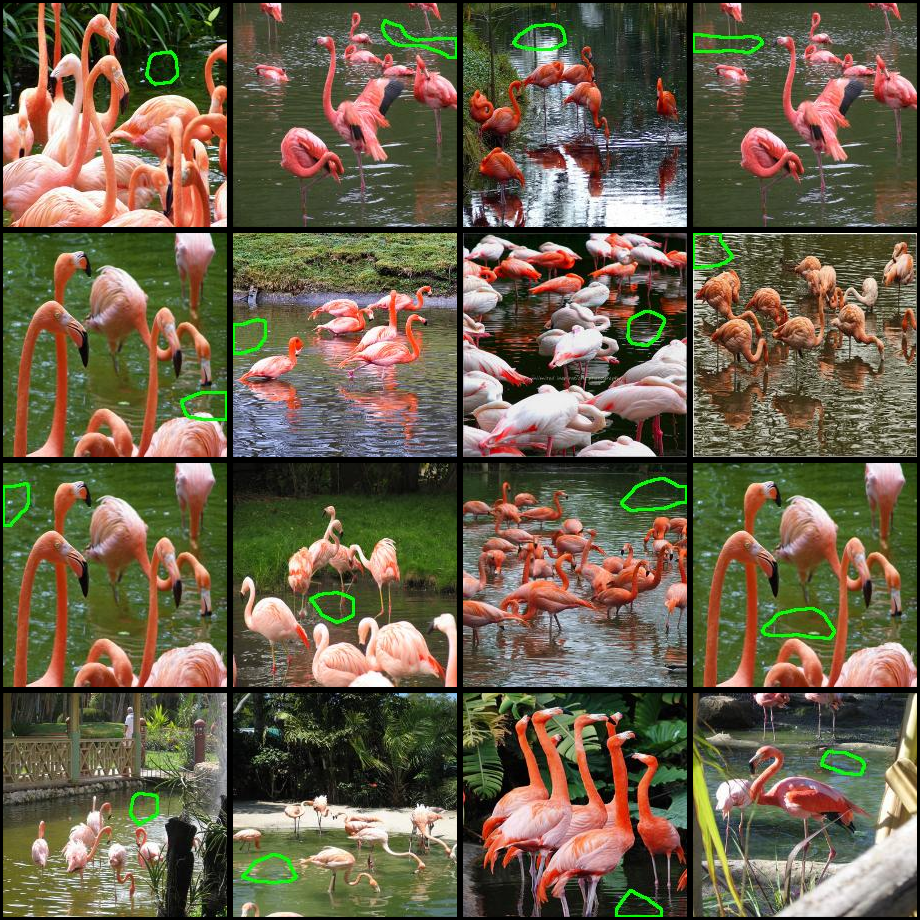

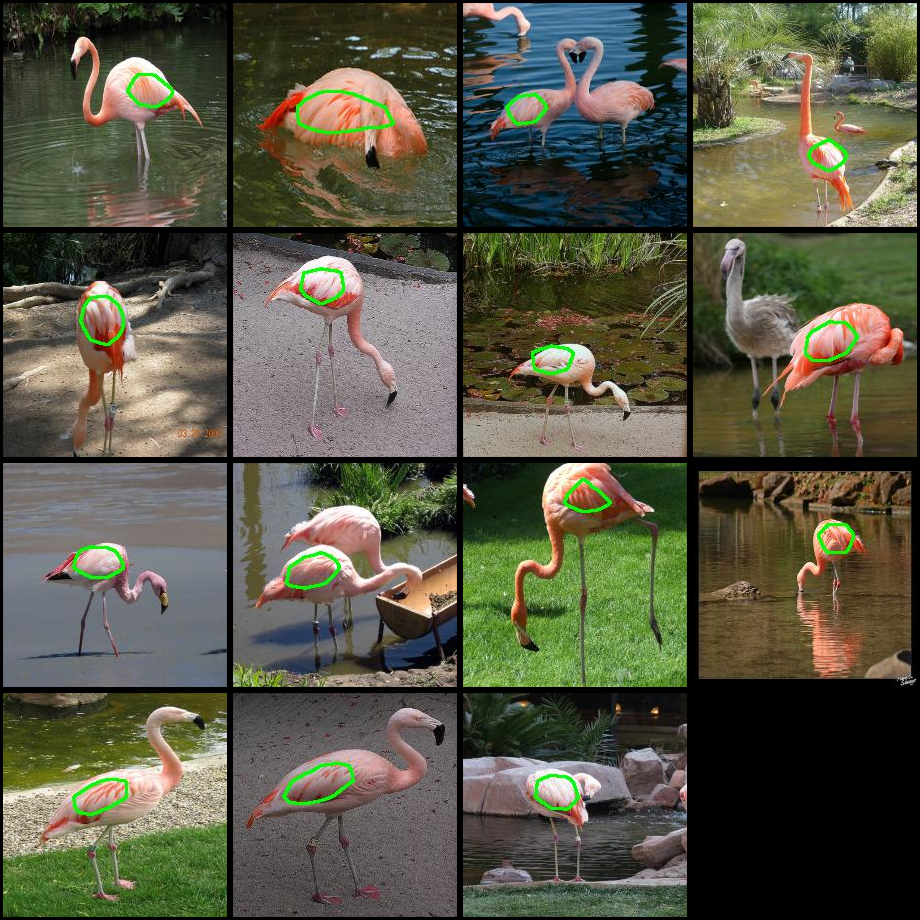

In [3]:
# Traverse the directory and display each image of the discovered concepts
for root, dirs, files in os.walk('results/training_results/flamingo/grids_short'):
    for file in files:            
        file_path = os.path.join(root, file)
        if file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            display(Image(filename=file_path, width=600, height=600))

## Step 3: Running Inference

Finally, we can apply the learned concepts to new feature vectors produced by the CNN when it makes predictions on new images.

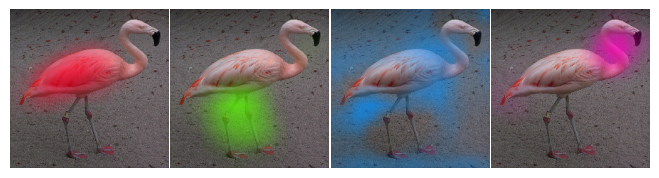

In [4]:
# Execute the inference pipeline on a new flamingo image
run_inference_pipeline(
    data_path='imagenet_data/flamingo/n02007558_723.JPEG',
    class_name='flamingo',
)

## Conclusion

This demo showcased the ability of our DFF pipeline to interpret feature vectors from a pretrained CNN and to apply these interpretations to understand new predictions. By transforming abstract feature vectors into tangible visual concepts, we provide deeper insights into the CNN’s decision-making process.